# Test 31: Bartlett’s test for equality of K variances

## Objective

- You have $K$ populations
- Are the variances of all populations equal?

## Assumptions

- All populations are normally distributed

## Method

- You have $K$ populations
- Draw a sample from each of $K$ populations 
- Each sample has size $n_1, n_2, ... n_K$ 
- Compute the variances $s_1^2, s_2^2, ... s_K^2$ for each sample

- The overall variance is therefore
$$\begin{aligned}
    s^2 &= \frac{\sum_{j=1}^{K} (n_j - 1) \cdot s_j^2}{\sum_{j=1}^{K} (n_j - 1)}
\end{aligned}$$

- Finally, compute the following statistics
$$\begin{aligned}
    B &= \frac{\ln(10)}{C} \cdot [\sum (n_j - 1) \cdot \log s^2 - \sum (n_j - 1) \log s_j^2] \\ \\

    C &= 1 + \frac{1}{3 (K+1)} \cdot [\sum \frac{1}{(n_j -1)} - \frac{1}{\sum (n_j - 1)}]
\end{aligned}$$

- There are 2 cases to consider (i) $n_j \gt 6$ and (ii) $n_j \le 6$
    1. For $n_j \gt 6$: 
        - The test statistic is $B$
        - $B$ follows a $\chi^2$ distribution with $K-1$ degrees of freedom. 
        - The null hypothesis (all variances are equal) will be rejected if $B$ exceeds the relevant critical value

    2. For $n_j \le 6$
        - The test statistic is $B \cdot C$
        - $B \cdot C$ follows the Bartlett critical values (Table 12)
        - The null hypothesis (all variances are equal) will be rejected if $B \cdot C$ exceeds the relevant critical value

## Proof that test statistic distributions are correct

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

### Proof that B is $\chi^2$ when $n \gt 6$

In [22]:
K = 4
MEAN = [5] * K
VARIANCE = [2] * K
SAMPLE_SIZE = [200] * K

def get_test_statistic_for_large_n():
    samples = [np.random.normal(x,y,z) for x,y,z in zip(MEAN, VARIANCE, SAMPLE_SIZE)]
    sample_variance = [np.var(x, ddof=1) for x in samples]
    overall_variance = (
        np.sum([(n-1)*var for n, var in zip(SAMPLE_SIZE, sample_variance)]) /
        np.sum([(n-1) for n in SAMPLE_SIZE])
    )

    C = (
        1 +
        (
            (1/(3 * (K+1))) * 
            (np.sum([1/(n-1) for n in SAMPLE_SIZE]) - 1/np.sum([(n-1) for n in SAMPLE_SIZE]))
        )
    )
    B = (
        np.log(10)/C * 
        (
            np.sum([(n-1) * np.log10(overall_variance) for n in SAMPLE_SIZE]) -
            np.sum([(n-1) * np.log10(var) for n, var in zip(SAMPLE_SIZE, sample_variance)])
        )
    )
    return B

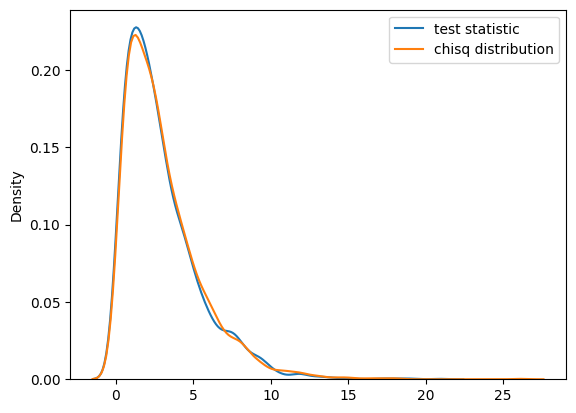

In [23]:
test_statistic_distribution = [get_test_statistic_for_large_n() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(df=K-1, size=3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()

### Proof that B*C follows critical values in Bartlett table when $n \lt 6$

In [53]:
K = 4
MEAN = [5] * K
VARIANCE = [2] * K
SAMPLE_SIZE = [4] * K

def compute_C():
    C = (
        1 +
        (
            (1/(3 * (K+1))) * 
            (np.sum([1/(n-1) for n in SAMPLE_SIZE]) - 1/np.sum([(n-1) for n in SAMPLE_SIZE]))
        )
    )
    return C

def get_test_statistic_for_small_n():
    samples = [np.random.normal(x,y,z) for x,y,z in zip(MEAN, VARIANCE, SAMPLE_SIZE)]
    sample_variance = [np.var(x, ddof=1) for x in samples]
    overall_variance = (
        np.sum([(n-1)*var for n, var in zip(SAMPLE_SIZE, sample_variance)]) /
        np.sum([(n-1) for n in SAMPLE_SIZE])
    )

    C = compute_C()
    B = (
        np.log(10)/C * 
        (
            np.sum([(n-1) * np.log10(overall_variance) for n in SAMPLE_SIZE]) -
            np.sum([(n-1) * np.log10(var) for n, var in zip(SAMPLE_SIZE, sample_variance)])
        )
    )
    return B*C

In [56]:
test_statistic_small_n_distribution = [get_test_statistic_for_small_n() for _ in range(3_000)]
test_statistic_large_n_distribution = [get_test_statistic_for_large_n() for _ in range(3_000)]
C = compute_C()
print(f"{C=}")

CRITICAL_VALUE_K4_C1 = 8.63

print(np.percentile(test_statistic_small_n_distribution, 95))
print(np.percentile(test_statistic_large_n_distribution, 95))

C=1.0833333333333333
8.390868968663527
8.91773641932785
